In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
import seaborn as sns

C:\Users\lidia\AppData\Local\Temp\ipykernel_21072\725261274.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
file_path = r'C:\Users\lidia\Desktop\Police.csv'
police = pd.read_csv('Police.csv', index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'Police.csv'

In [4]:
police['Date'] = pd.to_datetime(police['Date'])

police['Year'] = police['Date'].dt.year

#delete year 2018
police = police[police.Year != 2018]

In [12]:
category_counts = police['Category'].value_counts()

#Define new dataframe
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [13]:
# Specific crime category to focus on
crime_category = 'ASSAULT'

#Create empty dataframe with columns corresponding to focuscrimes, and rows corresponding to days of the week
df = pd.DataFrame(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], columns = [i for i in  focuscrimes])

In [14]:
#iterate through each day of the week
for day in df.index:
    #iterate through each crime
    for crime in df.columns:
        #get all rows where the day of the week is equal to the current day and the category is equal to the current crime
        df.loc[day, crime] = police[(police["DayOfWeek"] == day) & (police["Category"] == crime)].shape[0]

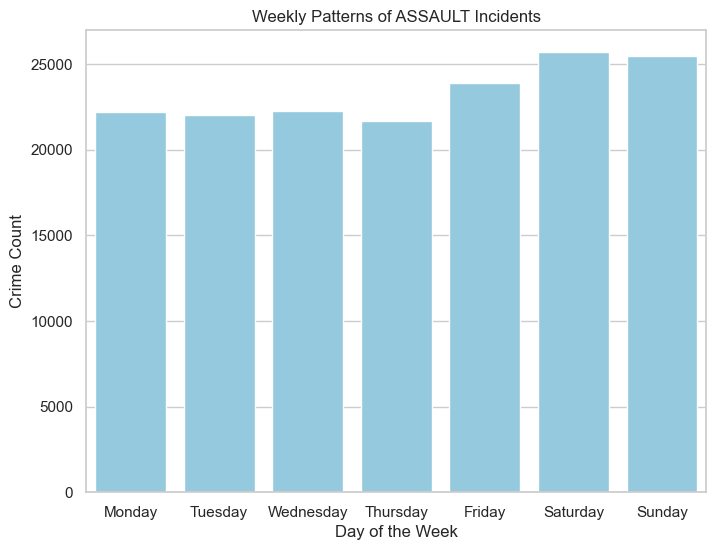

In [15]:
# Filter the DataFrame to include only the specified crime category
df_assault = df[[crime_category]]

# Visualize weekly patterns for the specified crime category
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Plot bar chart for the assault category
sns.barplot(x=df_assault.index, y=df_assault[crime_category], color='skyblue')

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title(f"Weekly Patterns of {crime_category} Incidents")

# Show the plot
plt.show()

In [17]:
#months
#Create empty dataframe with columns corresponding to focuscrimes, and rows corresponding to days of the week
df2 = pd.DataFrame(index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], columns = [i for i in  focuscrimes])

In [18]:
#iterate through each month of the year
for month in df2.index:
    #iterate through each crime
    for crime in df2.columns:
        #get all rows where the day of the week is equal to the current day and the category is equal to the current crime
        df2.loc[month, crime] = police[(police["Date"] == month) & (police["Category"] == crime)].shape[0]

In [19]:
# Filter the 'df' DataFrame to include only the specified crime category
df2_assault = df2[[crime_category]]

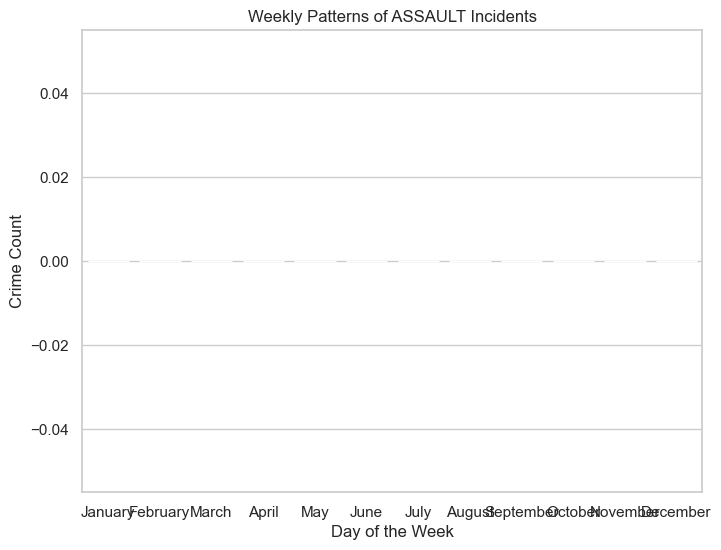

In [22]:
# Visualize weekly patterns for the specified crime category
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Plot bar chart for the assault category
sns.barplot(x=df2_assault.index, y=df2_assault[crime_category], color='skyblue')

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title(f"Weekly Patterns of {crime_category} Incidents")

# Show the plot
plt.show()

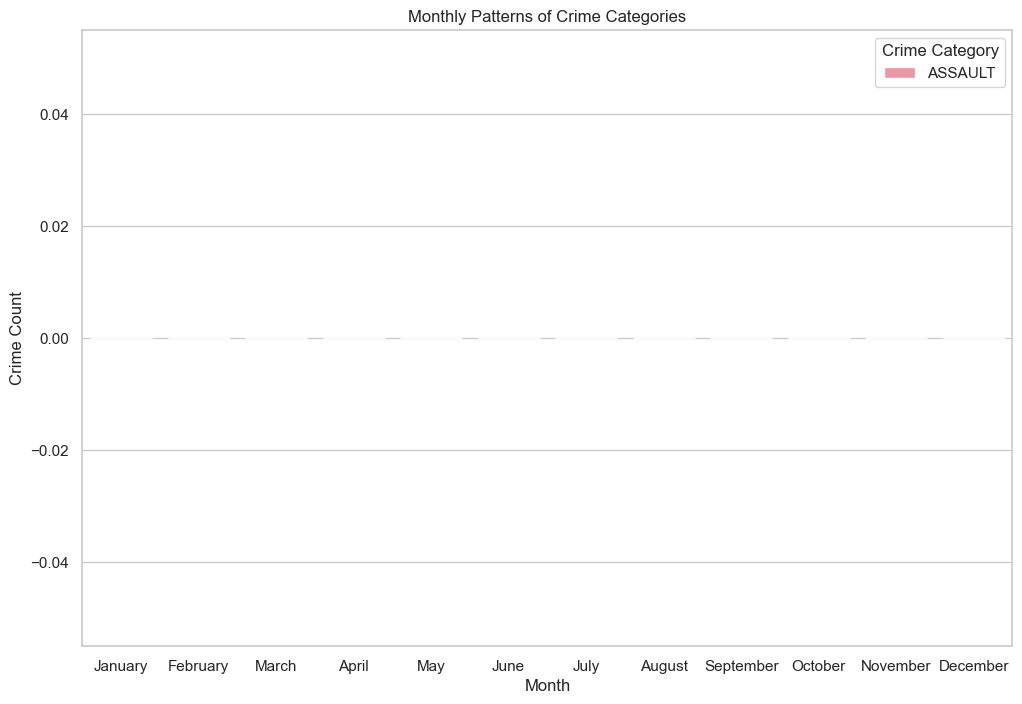

In [23]:
# Visualize monthly patterns
#read Date and use the last number
#use if and else for those than don't work

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Iterate through each crime
for crime in df2_assault.columns:
    # Plot bar chart for each crime category
    sns.barplot(x=df2_assault.index, y=df2_assault[crime], label=crime)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Monthly Patterns of Crime Categories")
plt.legend(title="Crime Category", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()